스타벅스 분석
* 가설 3 : 소득과 스타벅스 매장 입점의 상관성 + 리저브 매장과 소득의 상관관계
1. 월 평균소득에 따른 단계구분도 + 리저브 매장 위치
2. 상관계수 분석 : 1)소득 - 매장수 2)소득 리저브 매장수 -> 산점도 그래프 그리기
3. 지출 카테고리 중 가장 키포인트가 되는 지출?

# 데이터 전처리: 상현쓰가 끝냄

In [36]:
import pandas as pd
final_df = pd.read_excel('./데이터수집+전처리+files/Starbucks Data/final_df.xlsx')
final_df.head()
# starbucks_st = pd.read_excel('./data/seoul_st_store_info.xlsx')

,자치구,위도,경도,인구 수 (명),인구밀도 (명/㎢),스타벅스 지점 수,리저브 매장,지점 당 인구수 (명),소득구간,월평균소득,총지출액
0,강남구,37.495985,127.066409,542327,84271,90,11,6025,9,4943841,2608201860000
1,강동구,37.549208,127.146482,463005,80589,17,1,27235,7,3292857,160400134000
2,강북구,37.646995,127.014716,295773,67566,6,0,49295,6,2547460,61629372000
3,강서구,37.565762,126.822656,572382,99690,27,1,21199,7,3160623,196544942000
4,관악구,37.465399,126.943807,502430,83932,12,1,41869,6,2771927,118122959000


In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   자치구           25 non-null     object 
 1   위도            25 non-null     float64
 2   경도            25 non-null     float64
 3   인구 수 (명)      25 non-null     int64  
 4   인구밀도 (명/㎢)    25 non-null     int64  
 5   스타벅스 지점 수     25 non-null     int64  
 6   리저브 매장        25 non-null     int64  
 7   지점 당 인구수 (명)  25 non-null     int64  
 8   소득구간          25 non-null     int64  
 9   월평균소득         25 non-null     int64  
 10  총지출액          25 non-null     int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 2.3+ KB


# 시각화

## 시각화 1 : 지도 시각화
월 소득별 단계 구분도 + 그 위에 스타벅스 매장 수 버블로 표기

## 시각화 2 : 산포도 그래프 + 상관계수 분석

In [38]:
final_df[['스타벅스 지점 수','월평균소득']].corr()

,스타벅스 지점 수,월평균소득
스타벅스 지점 수,1.000000,0.797198
월평균소득,0.797198,1.000000


In [40]:
import scipy.stats as stats
stats.pearsonr(final_df['스타벅스 지점 수'],final_df['월평균소득'])

PearsonRResult(statistic=0.7971977250893262, pvalue=1.8386298926655236e-06)

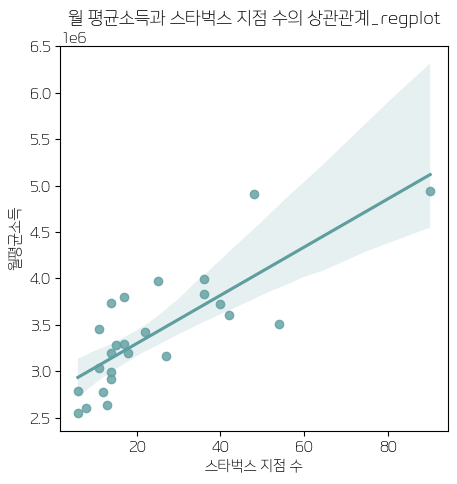

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family='paybooc')
fig = plt.figure(figsize=(5,5))
plt.title('월 평균소득과 스타벅스 지점 수의 상관관계_regplot')
sns.regplot(x='스타벅스 지점 수', y='월평균소득', data=final_df,color='cadetblue')

plt.show()

In [42]:

final_df[['리저브 매장','월평균소득']].corr()

,리저브 매장,월평균소득
리저브 매장,1.000000,0.729244
월평균소득,0.729244,1.000000


In [43]:
# 상관계수가 유의미한가
import scipy.stats as stats 
stats.pearsonr(final_df['리저브 매장'],final_df['월평균소득'])

PearsonRResult(statistic=0.729243827915415, pvalue=3.5421190583132025e-05)

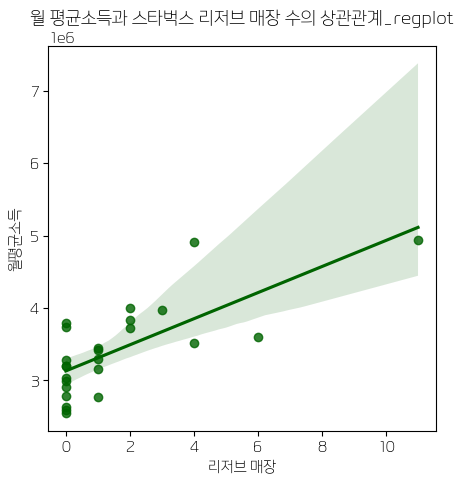

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family='paybooc')
fig = plt.figure(figsize=(5,5))
plt.title('월 평균소득과 스타벅스 리저브 매장 수의 상관관계_regplot')
sns.regplot(x='리저브 매장', y='월평균소득', data=final_df,color='darkgreen')

plt.show()

# 월평균소득 및 지출이 높은 구에서 지출 카테고리-매장 상관계수

### df 전처리 1차

In [45]:
import pandas as pd
corr = pd.read_csv('./데이터수집+전처리+files/Starbucks Data/자치구별 소득소비액 (2023년 2분기).csv',encoding='cp949')
# 칼럼 이름 변경
columns = ['기준년분기','행정동코드','행정동','월평균소득','소득구간','지출_total','식료품','의류','생활용품','의료비','교통','교육','유흥','여가','기타','음식']
corr = corr.set_axis(columns, axis='columns')
# 필요 없는 칼럼 삭제 및 스타벅스 지점 수 칼럼 추가
corr.drop('행정동코드',axis=1,inplace=True)
corr.sort_values('행정동',ascending=True,inplace=True,ignore_index=True)
# corr = corr.reset_index()
corr['스타벅스 지점수'] = final_df['스타벅스 지점 수']
corr.head()

,기준년분기,행정동,월평균소득,소득구간,지출_total,식료품,의류,생활용품,의료비,교통,교육,유흥,여가,기타,음식,스타벅스 지점수
0,20232,강남구,4943841,9,2608201860000,45268321000,34562874000,9994466000,132079067000,28871639000,34820526000,11404132000,1351602285000,872355366000,87243184000,90
1,20232,강동구,3292857,7,160400134000,23992377000,2401188000,1749637000,20136909000,3820607000,6384191000,2829886000,71083053000,3848713000,24153573000,17
2,20232,강북구,2547460,6,61629372000,15846136000,1782119000,1171002000,10614563000,3354150000,1603207000,2908287000,3851490000,2893375000,17605043000,6
3,20232,강서구,3160623,7,196544942000,34606803000,6416265000,2093899000,31754728000,29615573000,6447544000,4985539000,25650372000,17705002000,37269217000,27
4,20232,관악구,2771927,6,118122959000,30465580000,3263734000,1598044000,16862123000,2765241000,14605448000,5526956000,7047927000,4823787000,31164119000,12


In [46]:
corr.to_excel('./데이터수집+전처리+files/Starbucks Data/seoul_income.xlsx',index=False)

## 월평균소득과 지출의 상관관계

In [47]:
# 소득 - 지출 상관계수 도출 : 0.47로 뚜렷한 양적 선형 관계를 보임
corr[['월평균소득','지출_total']].corr()

,월평균소득,지출_total
월평균소득,1.000000,0.469383
지출_total,0.469383,1.000000


In [48]:
# 피어슨상관계수 -> pvalue 0.017923801954677444 로 유의미
import scipy.stats as stats
stats.pearsonr(corr['월평균소득'],corr['지출_total'])
result = stats.pearsonr(corr['월평균소득'],corr['지출_total'])
result

PearsonRResult(statistic=0.469382996062172, pvalue=0.017923801954677444)

#### 상관계수 분석

In [49]:
import scipy.stats as stats
corr_income = []
col_name = []
corr_coe = []
p_values = []
for col in corr.columns[5:-1]:
    corr_income = stats.pearsonr(corr['스타벅스 지점수'],corr[col])
    correlation_coefficient = round(corr_income.correlation,2)
    p_value = round(corr_income.pvalue,10)
    
    col_name.append(col)
    corr_coe.append(correlation_coefficient)
    p_values.append(p_value)


In [50]:
data = {
    '지출유형': col_name,
    '상관계수': corr_coe,
    'p-value': p_values
}

corr_df = pd.DataFrame(data=data)
# corr_df.sort_values('상관계수',ascending=False,inplace=True)
corr_df

,지출유형,상관계수,p-value
0,식료품,0.23,2.783367e-01
1,의류,0.75,1.555950e-05
2,생활용품,0.66,3.587846e-04
3,의료비,0.77,6.577400e-06
4,교통,0.35,9.016757e-02
5,교육,0.79,3.072800e-06
6,유흥,0.77,5.600600e-06
7,여가,0.62,8.520282e-04
8,기타,0.81,1.166800e-06
9,음식,0.92,1.000000e-10


In [55]:
corr_df['상관계수']

0    0.23
1    0.75
2    0.66
3    0.77
4    0.35
5    0.79
6    0.77
7    0.62
8    0.81
9    0.92
Name: 상관계수, dtype: float64

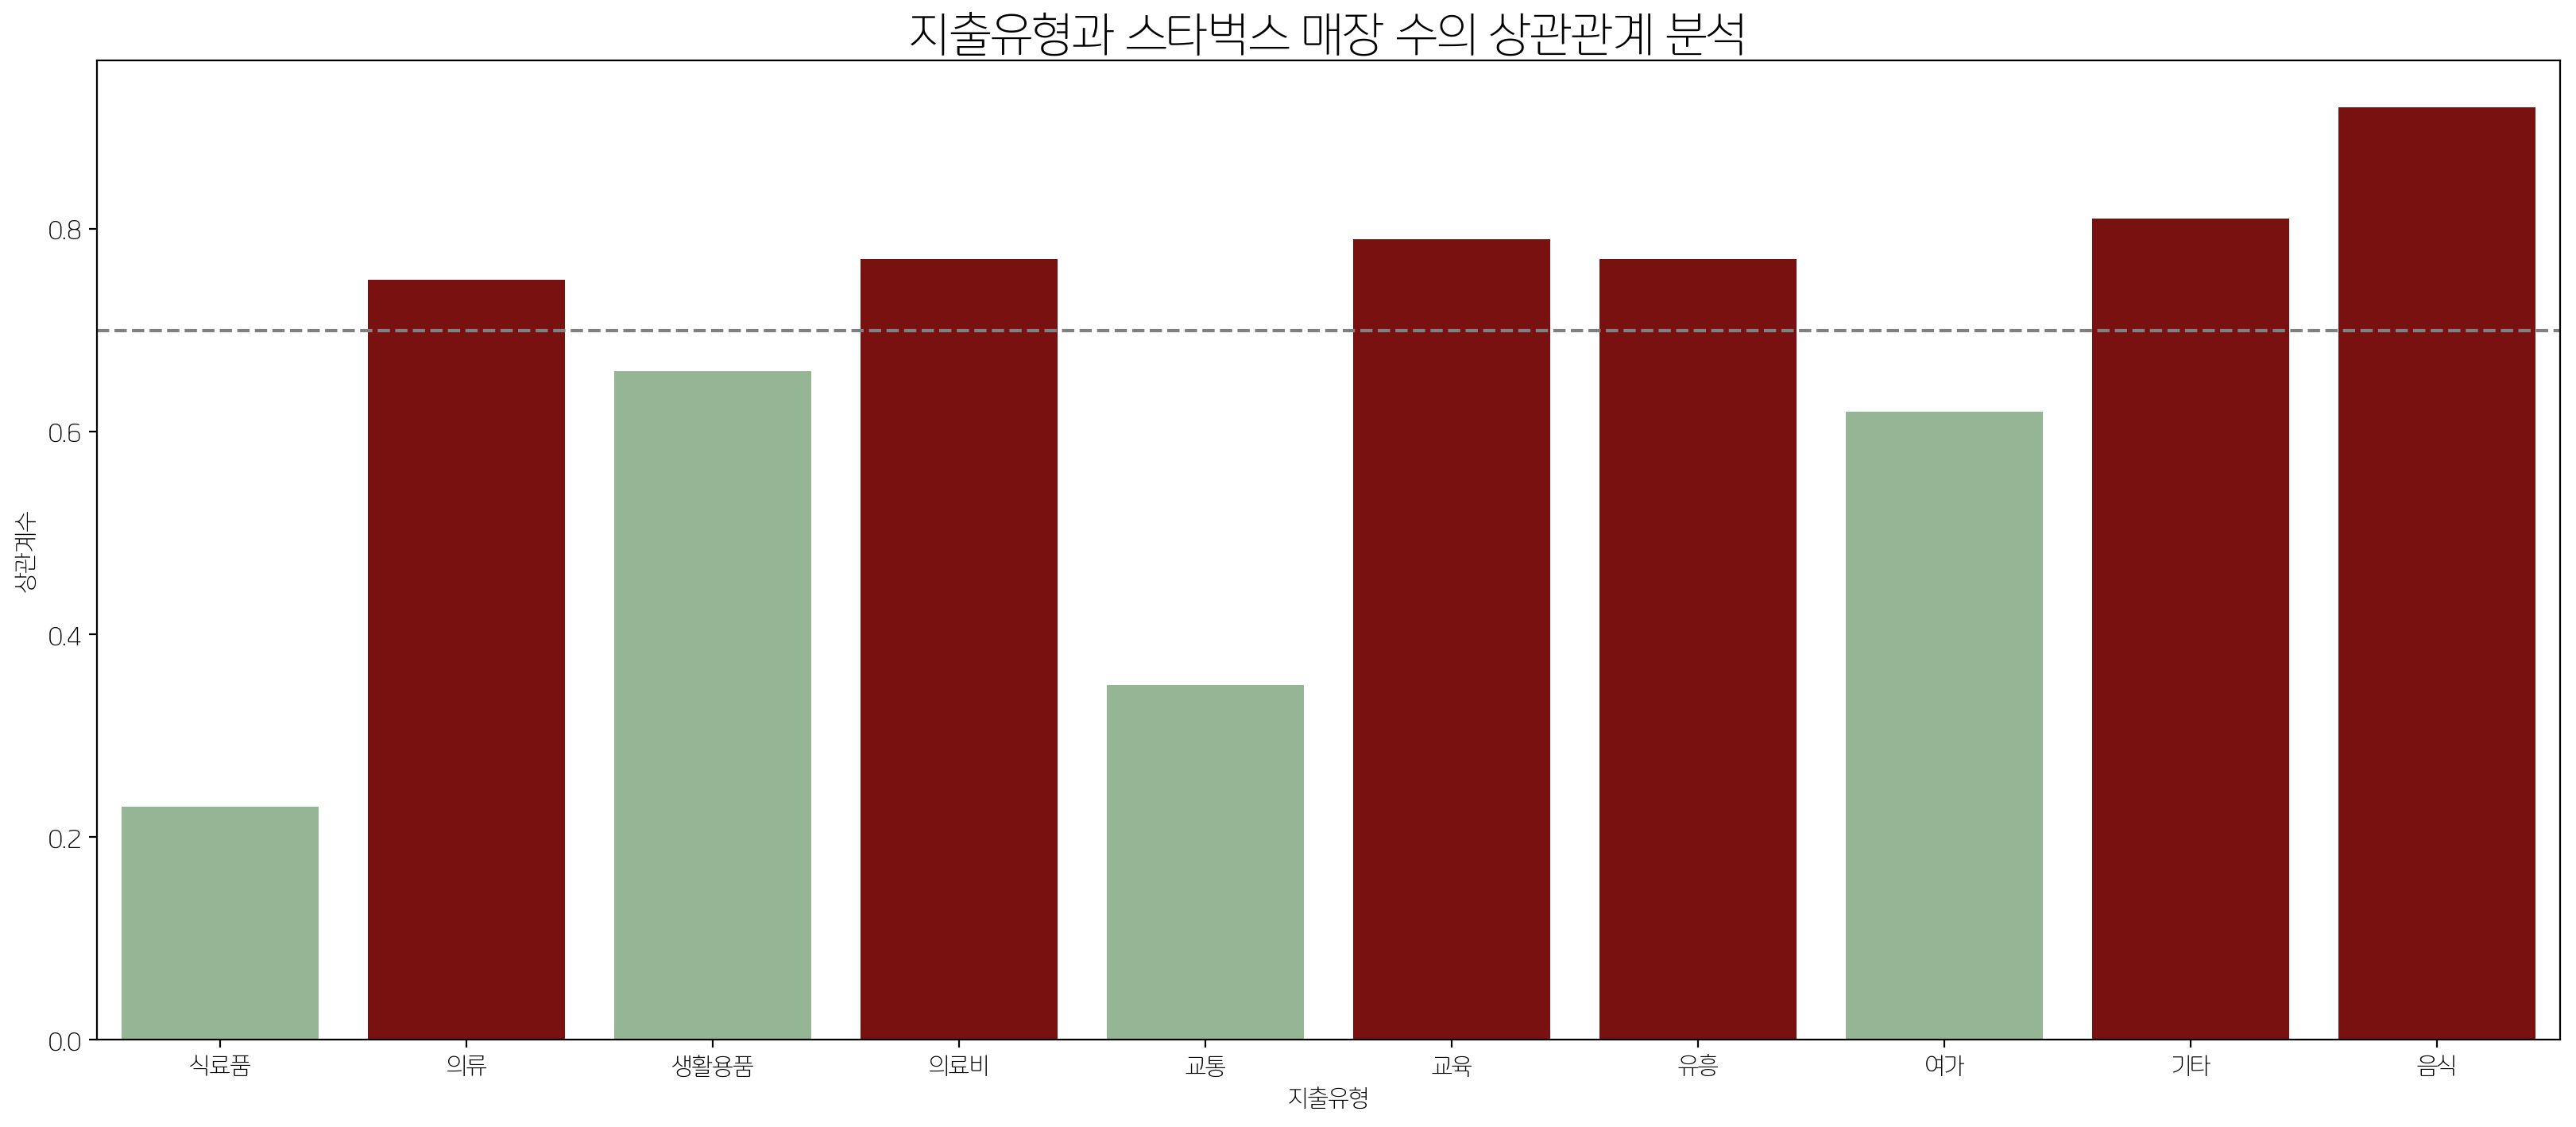

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='paybooc')

fig,ax= plt.subplots(figsize=(20, 8), dpi=200)
barcolors = ['darkred' if x > 0.70 else 'darkseagreen' for x in corr_df['상관계수']]
sns.barplot(x='지출유형', y='상관계수', data=corr_df, palette=barcolors, ax=ax)
plt.axhline(0.70,0,1,color='grey',linestyle='--',linewidth=1.5)
plt.title('지출유형과 스타벅스 매장 수의 상관관계 분석',fontsize=20)
plt.show()

#### 산점도 그리기

In [101]:
scatter_corr = corr.iloc[:,5:-3]
scatter_corr['음식'] = corr['음식']
scatter_corr['스타벅스 지점 수'] = corr['스타벅스 지점수']


In [102]:
scatter_corr.head()

,식료품,의류,생활용품,의료비,교통,교육,유흥,여가,음식,스타벅스 지점 수
0,45268321000,34562874000,9994466000,132079067000,28871639000,34820526000,11404132000,1351602285000,87243184000,90
1,23992377000,2401188000,1749637000,20136909000,3820607000,6384191000,2829886000,71083053000,24153573000,17
2,15846136000,1782119000,1171002000,10614563000,3354150000,1603207000,2908287000,3851490000,17605043000,6
3,34606803000,6416265000,2093899000,31754728000,29615573000,6447544000,4985539000,25650372000,37269217000,27
4,30465580000,3263734000,1598044000,16862123000,2765241000,14605448000,5526956000,7047927000,31164119000,12


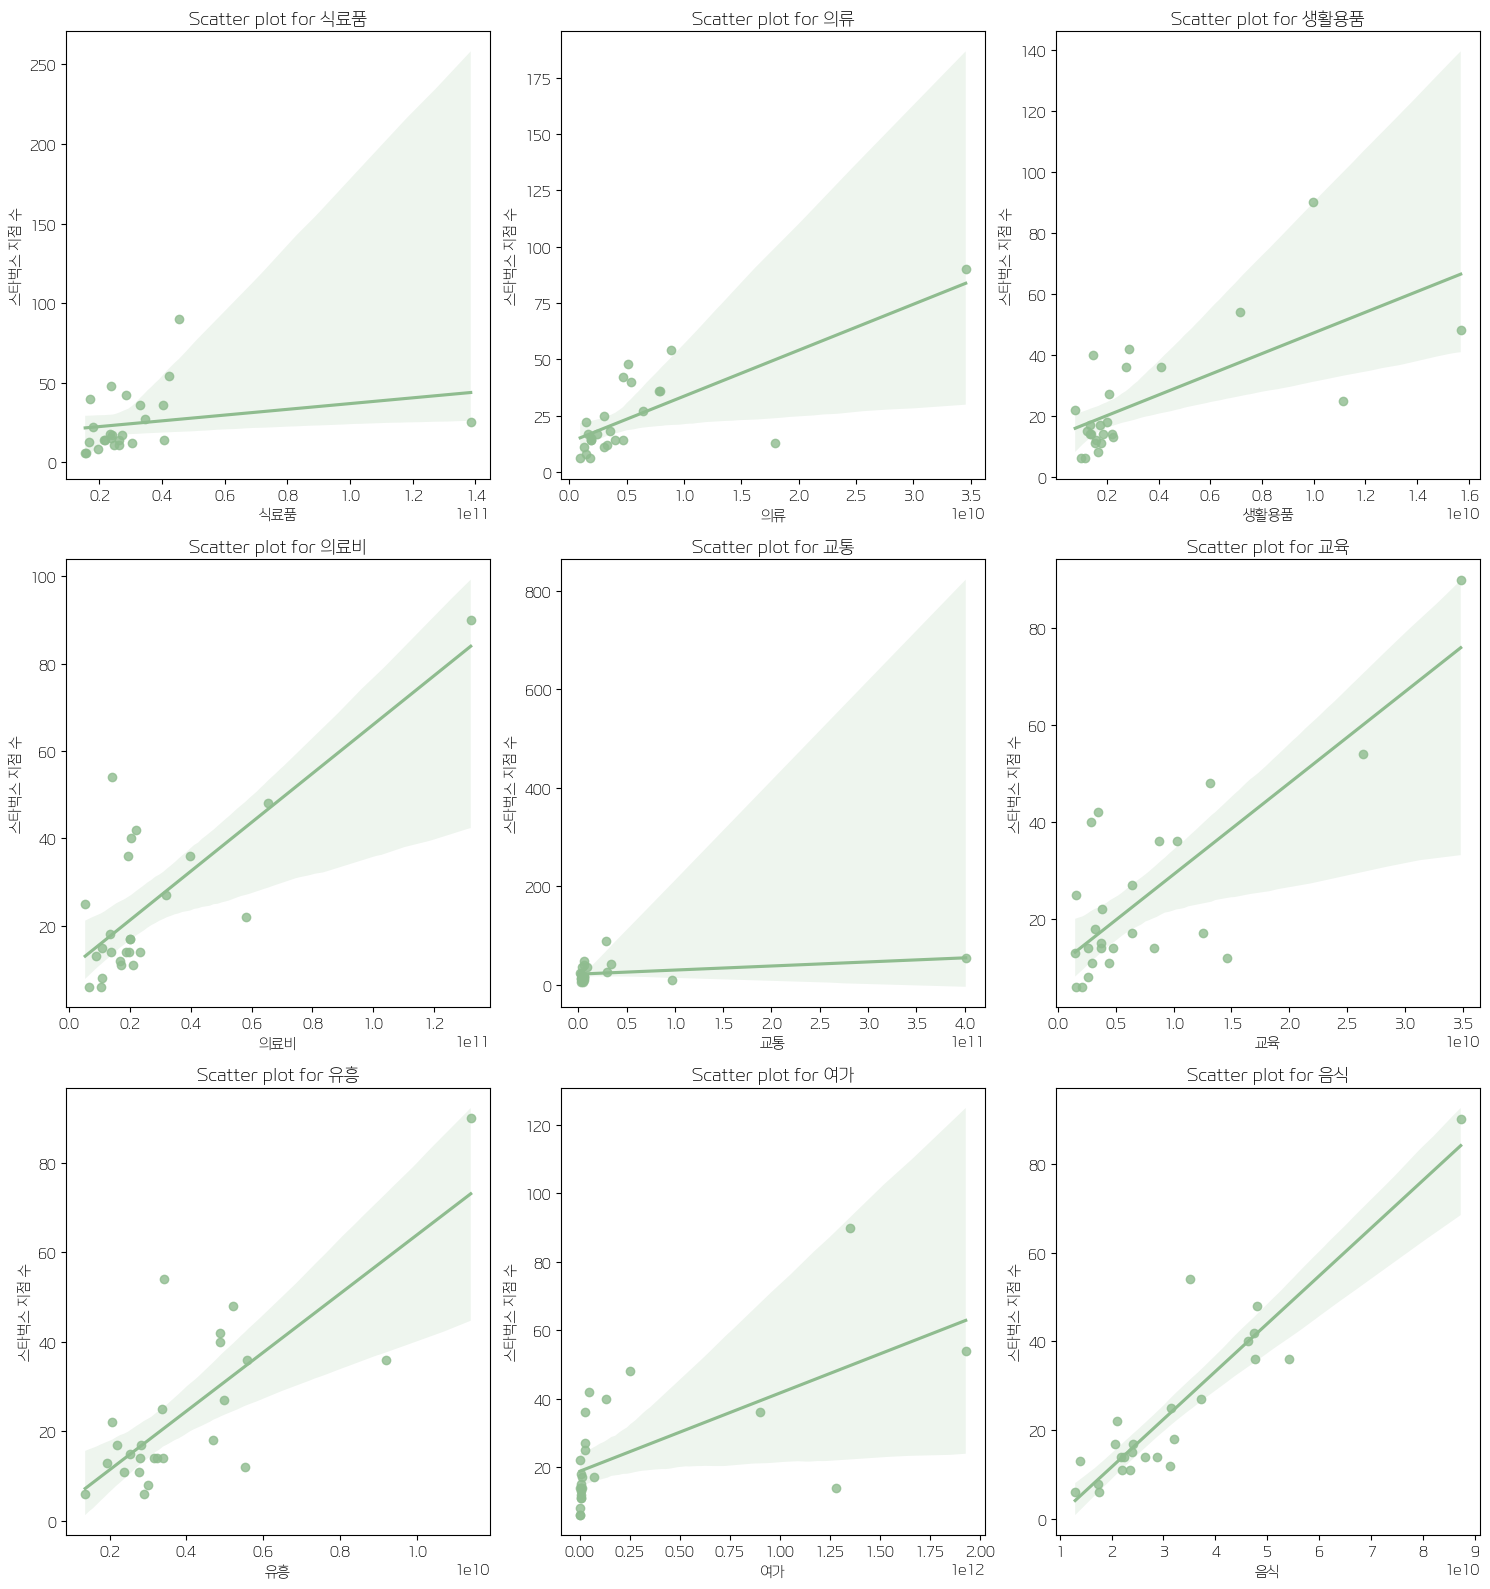

In [103]:
# 색 하나
fig, ax = plt.subplots(3, 3, figsize=(15, 16))


# 각 수치형 변수에 대한 히스토그램 그리기
for i, column in enumerate(scatter_corr.iloc[:,0:-1]):
    row_index = i // 3
    col_index = i % 3
    sns.regplot(x=column, y='스타벅스 지점 수', data=scatter_corr, color='darkseagreen', ax=ax[row_index, col_index])
    ax[row_index, col_index].set_title(f"Regplot for {column}")

# 레이아웃 조정
plt.tight_layout()
plt.show()

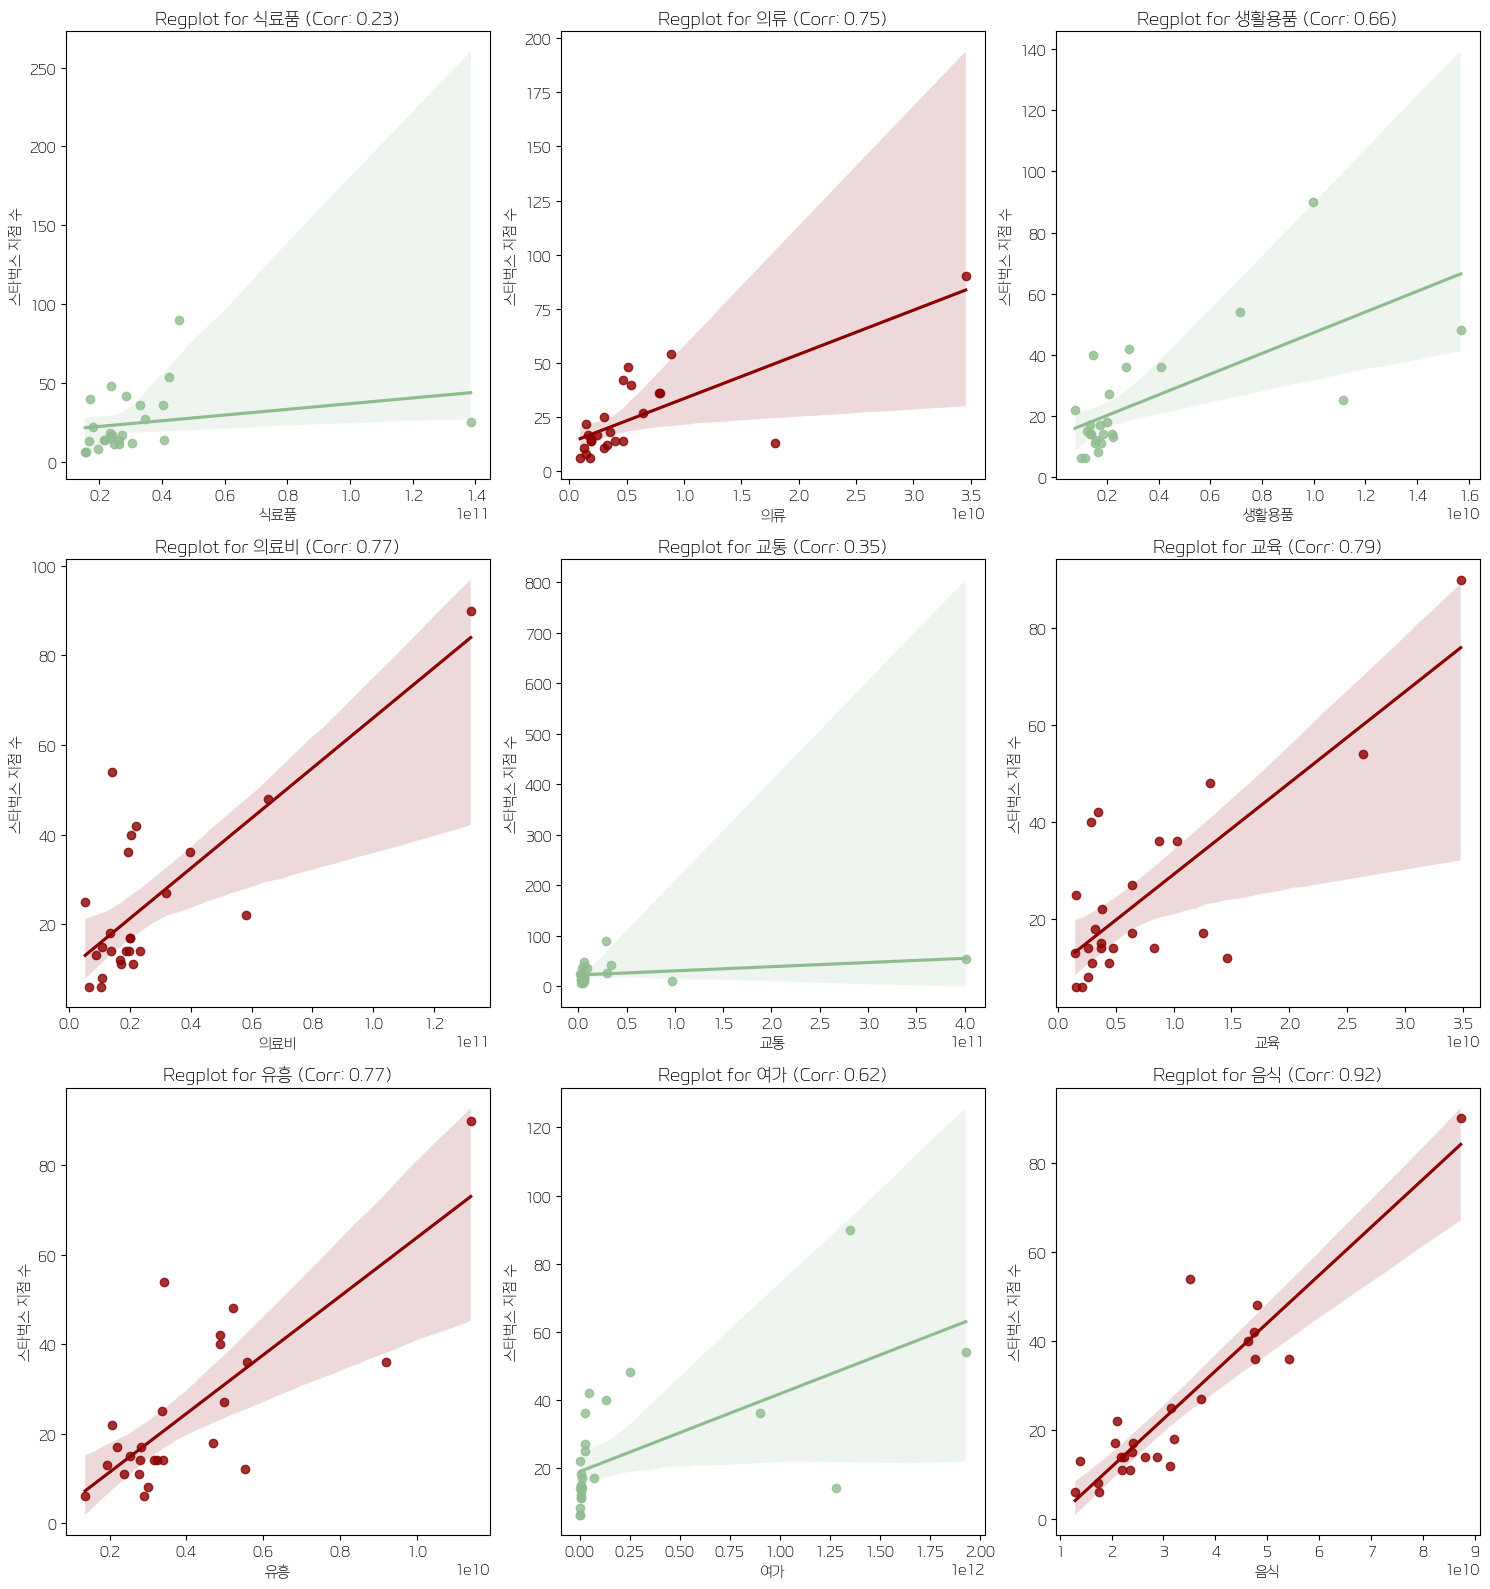

In [105]:
# 데이터프레임 분리

scatter_corr = corr.iloc[:,5:-3]
scatter_corr['음식'] = corr['음식']
scatter_corr['스타벅스 지점 수'] = corr['스타벅스 지점수']


# 그래프 시각화
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


fig, ax = plt.subplots(3, 3, figsize=(15, 16))

for i, column in enumerate(scatter_corr.iloc[:, 0:-1]):
    row_index = i // 3
    col_index = i % 3

    corr_coefficient, _ = stats.pearsonr(scatter_corr[column], scatter_corr['스타벅스 지점 수'])

    # Choose color based on correlation coefficient
    color = 'darkred' if np.abs(corr_coefficient) >= 0.7 else 'darkseagreen'

    # Plot with color
    sns.regplot(x=column, y='스타벅스 지점 수', data=scatter_corr, color=color, ax=ax[row_index, col_index])
    ax[row_index, col_index].set_title(f"Regplot for {column} (Corr: {corr_coefficient:.2f})")

# 레이아웃 조정
plt.tight_layout()
plt.show()

## Starbucks_list를 쓰는 시각화

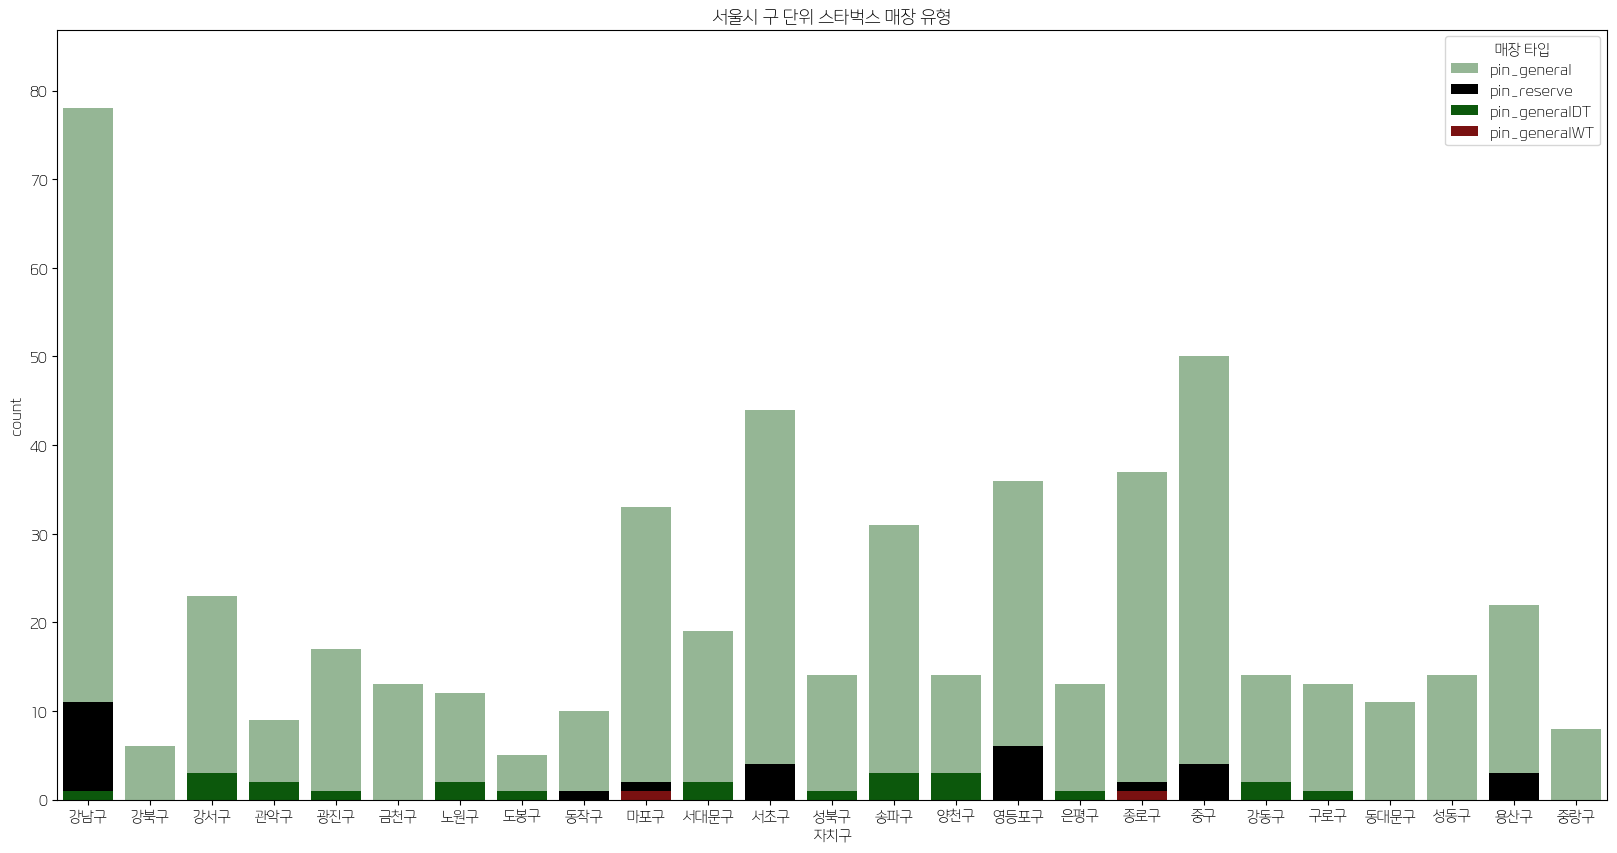

In [144]:
starbucks_list = pd.read_excel('../01.final/Starbucks Data/Starbucks_list.xlsx')
fig2 = plt.figure(figsize=(20,10))
colors = ['darkseagreen','black','darkgreen','darkred']
ax = sns.countplot(x='자치구',hue='매장 타입',dodge=False,data=starbucks_list,palette=colors)
# ax.set_yrim(0,100)
ax.set_ylim(0, ax.get_ylim()[1] + 5)
plt.title('서울시 구 단위 스타벅스 매장 유형')
plt.show()

In [138]:
starbucks_list['자치구'].value_counts()

자치구
강남구     90
중구      54
서초구     48
영등포구    42
종로구     40
송파구     36
마포구     36
강서구     27
용산구     25
서대문구    22
광진구     18
강동구     17
양천구     17
성북구     15
은평구     14
노원구     14
구로구     14
성동구     14
금천구     13
관악구     12
동작구     11
동대문구    11
중랑구      8
강북구      6
도봉구      6
Name: count, dtype: int64